<a href="https://colab.research.google.com/github/ilafmakke/capaston_nn/blob/main/capston_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pickle import TRUE
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Online retail dataset:https://www.kaggle.com/datasets/carrie1/ecommerce-data/code
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]


Saving data.csv to data.csv
['data.csv']


In [3]:
filename

'data.csv'

In [4]:
df = pd.read_csv(filename,encoding='latin-1')
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [41]:
df1=df
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [42]:
print(df1.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID     TotalSales  
count  406829.000000  541909.000000  
mean    15287.690570      17.987795  
min     12346.000000 -168469.600000  
25%     13953.000000       3.400000  
50%     15152.000000       9.750000  
75%     16791.000000      17.400000  
max     18287.000000  168469.600000  
std      1713.600303     378.810824  


In [43]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSales          0
dtype: int64

# Fill missing values in the 'Description' column with a predetermined text

In [44]:
df1['Description'].fillna('No description available',inplace=True)

# Show how many missing values remain in each column of the DataFrame
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSales          0
dtype: int64

# This code will produce a bar plot showingthe top 10  total sales for each product, with the products ordered by the amount of sales.

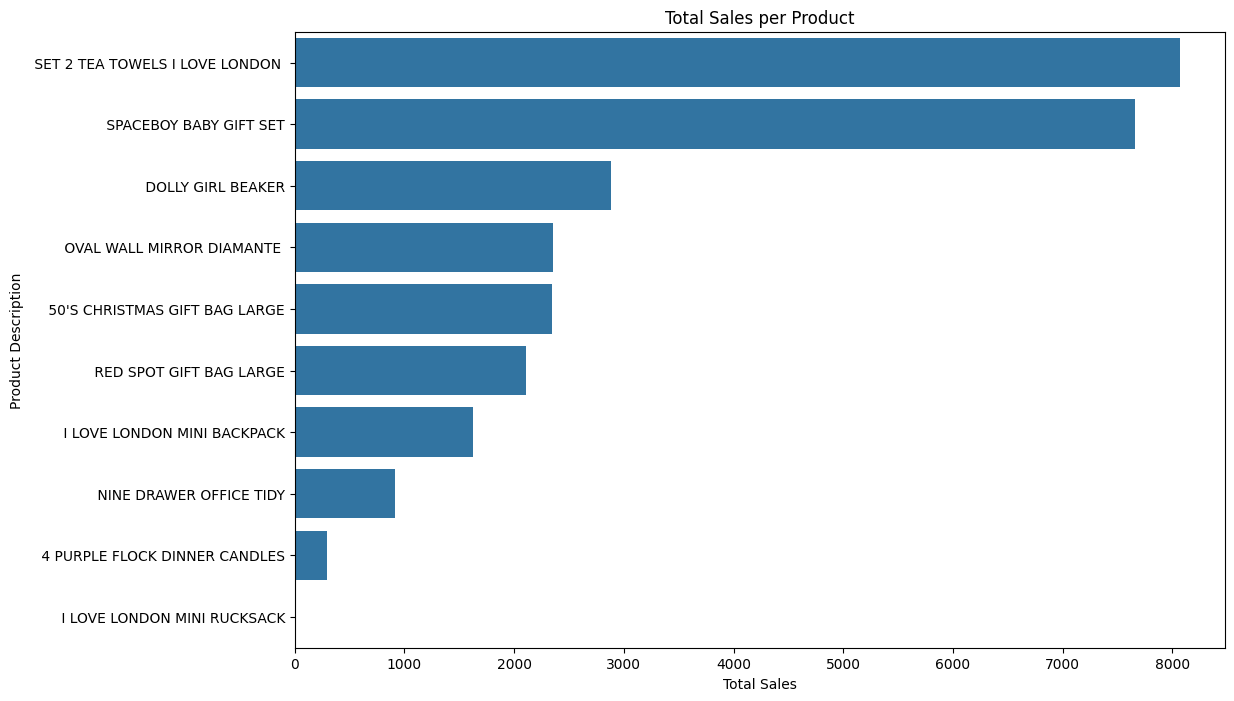

Product with maximum sales:  SET 2 TEA TOWELS I LOVE LONDON  with sales of 8074.65


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure InvoiceDate is in datetime format
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# Calculate total sales per product
df1['TotalSales'] = df1['Quantity'] * df1['UnitPrice']
product_sales = df1.groupby('Description')['TotalSales'].sum().reset_index().head(10)

# Find the product with the maximum sales
max_sales_product = product_sales.loc[product_sales['TotalSales'].idxmax()]

 #Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalSales', y='Description', data=product_sales.sort_values('TotalSales', ascending=False))
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.title('Total Sales per Product')
plt.show()

print(f"Product with maximum sales: {max_sales_product['Description']} with sales of {max_sales_product['TotalSales']:.2f}")

In [46]:
# Define features and target variable
df1=df1.drop('InvoiceNo', axis=1)
df1=df1.drop('Description', axis=1)
df1=df1.drop('CustomerID', axis=1)
df1

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
0,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...
541904,22613,12,2011-12-09 12:50:00,0.85,France,10.20
541905,22899,6,2011-12-09 12:50:00,2.10,France,12.60
541906,23254,4,2011-12-09 12:50:00,4.15,France,16.60
541907,23255,4,2011-12-09 12:50:00,4.15,France,16.60


In [47]:
df1=df1.drop('TotalSales', axis=1)
df1

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...
541904,22613,12,2011-12-09 12:50:00,0.85,France
541905,22899,6,2011-12-09 12:50:00,2.10,France
541906,23254,4,2011-12-09 12:50:00,4.15,France
541907,23255,4,2011-12-09 12:50:00,4.15,France


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Country']=le.fit_transform(df['Country'])
df1

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,2010-12-01 08:26:00,2.55,36
1,71053,6,2010-12-01 08:26:00,3.39,36
2,84406B,8,2010-12-01 08:26:00,2.75,36
3,84029G,6,2010-12-01 08:26:00,3.39,36
4,84029E,6,2010-12-01 08:26:00,3.39,36
...,...,...,...,...,...
541904,22613,12,2011-12-09 12:50:00,0.85,13
541905,22899,6,2011-12-09 12:50:00,2.10,13
541906,23254,4,2011-12-09 12:50:00,4.15,13
541907,23255,4,2011-12-09 12:50:00,4.15,13


In [49]:
df1['Year'] = df1['InvoiceDate'].dt.year
df1['Month'] = df1['InvoiceDate'].dt.month
df1['Day'] = df1['InvoiceDate'].dt.day


In [58]:
df1=df1.drop('Description', axis=1)
df1

,StockCode,Quantity,UnitPrice,Country,Year,Month,Day
0,85123A,6,2.55,36,2010,12,1
1,71053,6,3.39,36,2010,12,1
2,84406B,8,2.75,36,2010,12,1
3,84029G,6,3.39,36,2010,12,1
4,84029E,6,3.39,36,2010,12,1
...,...,...,...,...,...,...,...
541904,22613,12,0.85,13,2011,12,9
541905,22899,6,2.10,13,2011,12,9
541906,23254,4,4.15,13,2011,12,9
541907,23255,4,4.15,13,2011,12,9


In [51]:
df1=df1.drop('InvoiceDate', axis=1)
df1

,StockCode,Quantity,UnitPrice,Country,Year,Month,Day,Description
0,85123A,6,2.55,36,2010,12,1,3919
1,71053,6,3.39,36,2010,12,1,3927
2,84406B,8,2.75,36,2010,12,1,913
3,84029G,6,3.39,36,2010,12,1,1910
4,84029E,6,3.39,36,2010,12,1,2912
...,...,...,...,...,...,...,...,...
541904,22613,12,0.85,13,2011,12,9,2380
541905,22899,6,2.10,13,2011,12,9,743
541906,23254,4,4.15,13,2011,12,9,749
541907,23255,4,4.15,13,2011,12,9,748


In [67]:
from sklearn.preprocessing import LabelEncoder

obj_columns = df1.select_dtypes(include=['object']).columns

lb = LabelEncoder()

for col in obj_columns:
    df1[col] = lb.fit_transform(df[col])

In [68]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df1.drop(columns=['Country'])
y=df1['Country']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print('X_train:',x_train.shape)
print('y_train:',y_train.shape)
print('X_test:',x_test.shape)
print('y_test:',y_test.shape)

X_train: (433527, 6)
y_train: (433527,)
X_test: (108382, 6)
y_test: (108382,)


In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# قم بتحديد النموذج
model = Sequential()

# إضافة الطبقة الأولى مع تفعيل التانجنت واستخدام dropout
model.add(Dense(150, activation='tanh', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.5))  # قم بتحديد نسبة الانقباض هنا (مثلاً 0.5 تعني 50% من الوحدات تتم إيقافها بشكل عشوائي)

# إضافة الطبقة الثانية
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))  # يمكنك تحديد نسبة الانقباض هنا

# إضافة الطبقة الثالثة
model.add(Dense(8, activation='relu'))

# الطبقة النهائية بدون تنشيط للتنبؤ بقيمة واحدة
model.add(Dense(1))

# قم بتجميع النموذج
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 6, 150)              │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6, 40)               │           6,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 40)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6, 8)                │             328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 6, 1)                │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,677 (26.08 KB)

 Trainable params: 6,677 (26.08 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [72]:
print(x_train.dtypes)
print(x_test.dtypes)

StockCode      int64
Quantity       int64
UnitPrice    float64
Year           int32
Month          int32
Day            int32
dtype: object
StockCode      int64
Quantity       int64
UnitPrice    float64
Year           int32
Month          int32
Day            int32
dtype: object


In [73]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)


Epoch 1/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - loss: 4.8358 - val_loss: 6.1303
Epoch 2/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 1.9129 - val_loss: 1.7704
Epoch 3/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 1.7433 - val_loss: 1.7670
Epoch 4/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - loss: 1.7275 - val_loss: 1.7694
Epoch 5/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 1.7520 - val_loss: 1.7669
Epoch 6/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 1.7306 - val_loss: 1.7683
Epoch 7/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 1.7352 - val_loss: 1.7741
Epoch 8/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 1.7257 - val_loss: 1.7665
Epoch 9/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 1.7496 - val_loss: 1.7640
Epoch 10/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 1.7173 - val_loss: 1.7641
Epoch 11/50
13548/13548 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - loss: 1.7389 - val_loss: 1.76

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
#'sigmoid,softmax,relu,tanh
nn = Sequential()
nn.add(layers.Dense(9, activation='relu', input_shape=(x.shape[1],)))
nn.add(layers.Dense(1, activation='linear'))
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn.compile(optimizer='sgd',loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
nn.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=40)

Epoch 1/40
10171/10171 [==============================] - 25s 2ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.0035
Epoch 2/40
10171/10171 [==============================] - 25s 2ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 3/40
10171/10171 [==============================] - 38s 4ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 4/40
10171/10171 [==============================] - 25s 3ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 5/40
10171/10171 [==============================] - 25s 2ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 6/40
10171/10171 [==============================] - 24s 2ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 7/40
10171/10171 [==============================] - 24s 2ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0035
Epoch 8/40
10

In [83]:
preds = model.predict(x_test)

preds
#res=pd.DataFrame()
#res['Actual']=y_test.values
#res['preds']=preds
#res

3387/3387 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]],

       [[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]],

       [[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]],

       ...,

       [[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]],

       [[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]],

       [[36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262],
        [36.002262]]], dtype=float32)

In [89]:
preds[:, 0, 0].shape

(108382,)

In [91]:
# prompt: transform the preds and y_test to  same data frame

import pandas as pd
res=pd.DataFrame()

res['Actual']=y_test.values
res['preds']=preds[:, 0, 0]
res


,Actual,preds
0,36,36.002262
1,36,36.002262
2,36,36.002262
3,36,36.002262
4,36,36.002262
...,...,...
108377,36,36.002262
108378,36,36.002262
108379,24,36.002262
108380,36,36.002262


In [95]:
# prompt: calculate the mse in neural network

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(res['Actual'], res['preds'])
print("Mean Squared Error:", mse)
r2_score(res['Actual'], res['preds'])


Mean Squared Error: 42.329327485038355


-0.07929623444441347